<a href="https://colab.research.google.com/github/laxmitalawar/Learn-Statistics/blob/master/Submission_model_TBXT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score,mean_absolute_error,median_absolute_error,mean_squared_error,mean_squared_log_error

from scipy.optimize import minimize
import statsmodels.tsa.api as smt
import statsmodels.api as sm
from tqdm import tqdm_notebook
from itertools import product
def mean_absolute_percentage_error(y_true,y_pred):
    return np.mean(np.abs(((y_true-y_pred)/y_true)))*100
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
Data=pd.read_csv("/train_csv.csv")
Data.head()


,id,time,feature
0,0,2019-03-19 00:00:00,237.97
1,1,2019-03-19 00:00:10,57.93
2,2,2019-03-19 00:00:20,90.53
3,3,2019-03-19 00:00:30,260.75
4,4,2019-03-19 00:00:40,49.70


In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       80 non-null     int64  
 1   time     80 non-null     object 
 2   feature  80 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.0+ KB


In [7]:
Data.isnull().sum()

id         0
time       0
feature    0
dtype: int64

In [8]:
pd.to_datetime(Data['time'],format=('%Y-%m-%d'))

0    2019-03-19 00:00:00
1    2019-03-19 00:00:10
2    2019-03-19 00:00:20
3    2019-03-19 00:00:30
4    2019-03-19 00:00:40
             ...        
75   2019-03-19 00:12:30
76   2019-03-19 00:12:40
77   2019-03-19 00:12:50
78   2019-03-19 00:13:00
79   2019-03-19 00:13:10
Name: time, Length: 80, dtype: datetime64[ns]

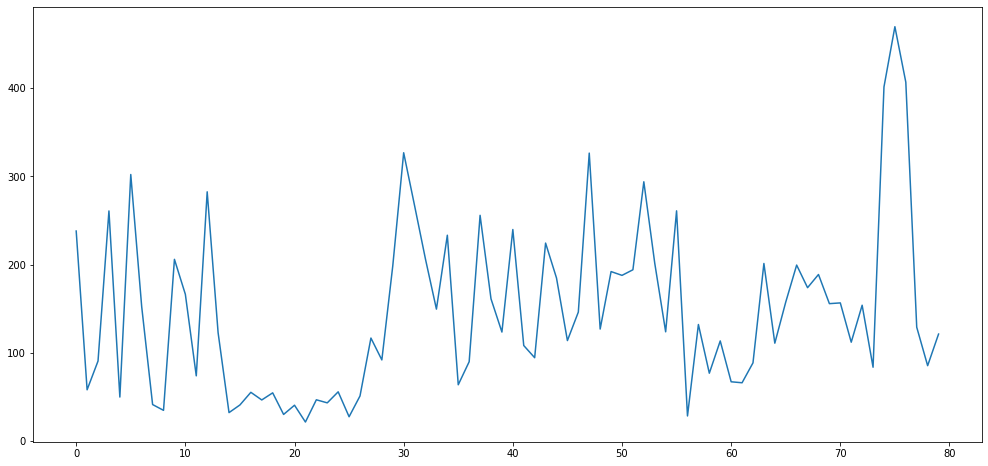

In [9]:
plt.figure(figsize=(17,8))
plt.plot(Data.feature)
plt.show()

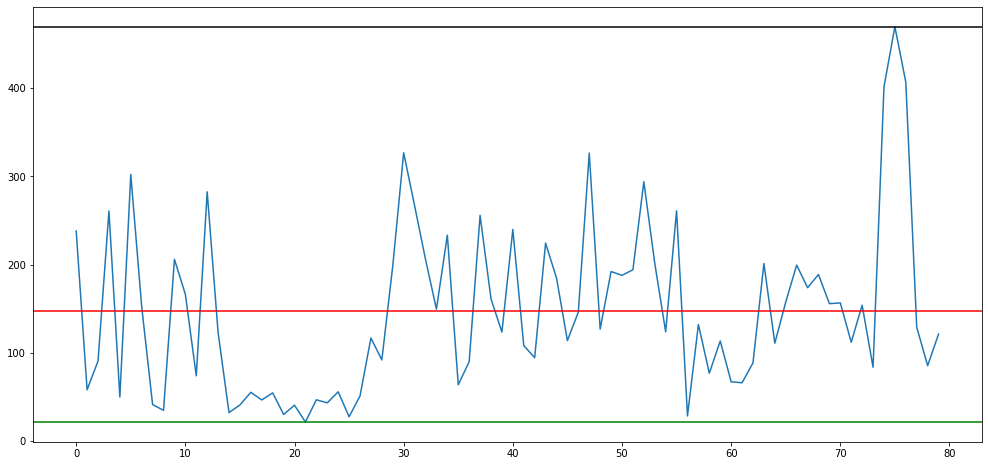

In [10]:
plt.figure(figsize=(17,8))
plt.plot(Data.feature)
plt.axhline(y=np.mean(Data.feature),color='red')
plt.axhline(y=np.min(Data.feature),color='green')
plt.axhline(y=np.max(Data.feature),color='black')

In [0]:
def tsplot(y,lags=None,figsize=(17,8),style='bmh'):
    if not isinstance(y,pd.Series):
        y=pd.Series(y)
    with plt.style.context(style='bmh'):
        fig=plt.figure(figsize=figsize)
        layout=(2,2)
        ts_ax=plt.subplot2grid(layout,(0,0),colspan=2)
        acf_ax=plt.subplot2grid(layout,(1,0))
        pacf_ax=plt.subplot2grid(layout,(1,1))
        y.plot(ax=ts_ax)
        p_value=sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time series analysis Plots \nDickey Fuller:p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y,lags=lags,ax=acf_ax)
        smt.graphics.plot_pacf(y,lags=lags,ax=pacf_ax)
        plt.tight_layout()

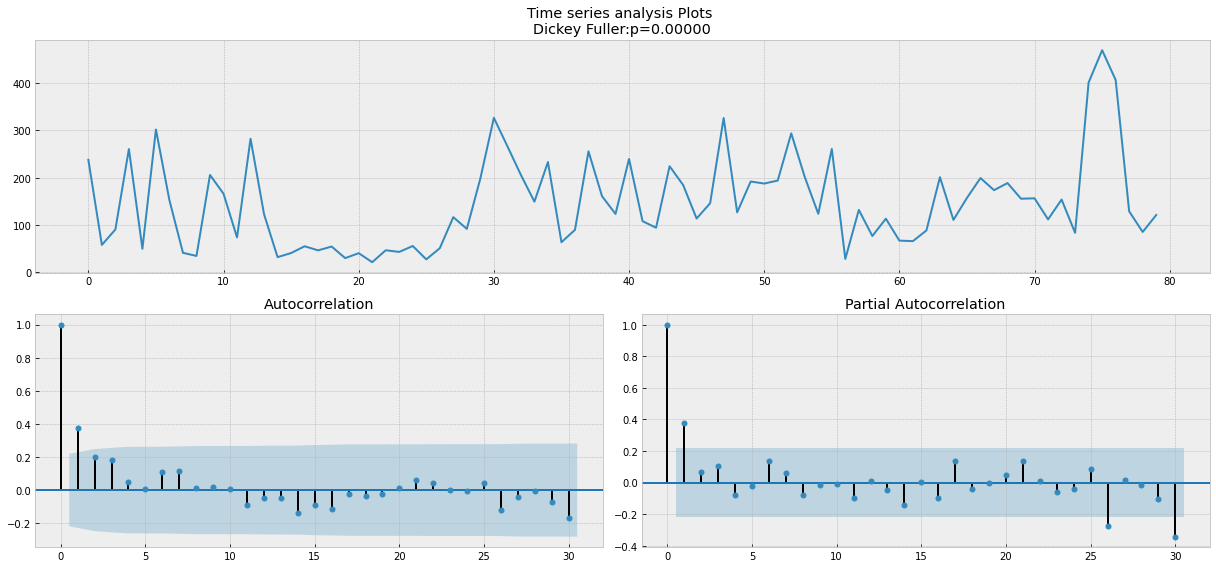

In [12]:
tsplot(Data.feature,lags=30)

In [13]:
p=range(0,3)
d=1
q=range(0,3)
P=range(0,3)
D=1
Q=range(0,3)
s=1
#Create a list for all possible combinations of parameters : 
parameters=product(p,q,P,Q)
parameters_list=list(parameters)
len(parameters_list)

81

In [14]:
best_model=sm.tsa.statespace.SARIMAX(Data.feature,order=(1,0,1),seasonal_order=(1,0,5,2)).fit()
print(best_model.summary())

                                 Statespace Model Results                                
Dep. Variable:                           feature   No. Observations:                   80
Model:             SARIMAX(1, 0, 1)x(1, 0, 5, 2)   Log Likelihood                -474.125
Date:                           Thu, 30 Apr 2020   AIC                            966.250
Time:                                   16:41:09   BIC                            987.688
Sample:                                        0   HQIC                           974.845
                                            - 80                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9998      0.004    248.579      0.000       0.992       1.008
ma.L1         -0.6367      0.103     -6.166

In [15]:
results=best_model.predict(start=Data.feature.shape[0],end=(Data.feature.shape[0]+40))
print(mean_absolute_percentage_error(Data.feature[s+d:],best_model.fittedvalues[s+d:]))

66.06186898455502


In [16]:
from math import sqrt

print(sqrt(mean_squared_error(Data.feature[s+d:],best_model.fittedvalues[s+d:])))

89.0442001727344


In [0]:
df=pd.DataFrame(results)
df.to_csv('mysubmission.csv')

In [18]:
#p,q,P,Q=result_table.parameter[0]
p=1
d=1
q=1

best_model_2=sm.tsa.statespace.SARIMAX(Data.feature,order=(p,d,q),
                                     seasonal_order=(1,0,1,7)).fit(disp=-1)
print(best_model_2.summary())

                                 Statespace Model Results                                
Dep. Variable:                           feature   No. Observations:                   80
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 7)   Log Likelihood                -466.544
Date:                           Thu, 30 Apr 2020   AIC                            943.089
Time:                                   16:41:10   BIC                            954.936
Sample:                                        0   HQIC                           947.835
                                            - 80                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3349      0.107      3.138      0.002       0.126       0.544
ma.L1         -0.9610      0.065    -14.797

In [19]:
s=7
res=best_model_2.predict(start=Data.feature.shape[0],end=(Data.feature.shape[0]+39))
print(mean_absolute_percentage_error(Data.feature[s+d:],best_model_2.fittedvalues[s+d:]))

66.42588790542672


In [20]:
print(mean_absolute_percentage_error(Data.feature[s+d:],best_model_2.fittedvalues[s+d:]))

66.42588790542672


In [21]:
from math import sqrt

print(sqrt(mean_squared_error(Data.feature[s+d:],best_model_2.fittedvalues[s+d:])))

83.3042587337665


In [22]:
df_2=pd.DataFrame(res, columns=['feature'])
print(df_2)
df_2.to_csv('submission.csv')

        feature
80   110.956692
81   207.179460
82   235.098317
83   203.110262
84   188.640994
85   136.505875
86   173.266696
87   199.631841
88   142.195236
89   125.823959
90   147.837166
91   157.707998
92   192.468165
93   168.044440
94   150.516980
95   188.723926
96   199.614287
97   184.972594
98   178.407147
99   155.286530
100  171.531935
101  183.190295
102  157.777022
103  150.533320
104  160.272213
105  164.639208
106  180.017840
107  169.212241
108  161.457706
109  178.361294
110  183.179428
111  176.701623
112  173.796925
113  163.567858
114  170.755181
115  175.913094
116  164.669707
117  161.464934
118  165.773634
119  167.705688
